<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/slakonet_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SlaKoNet: A Unified Slater-Koster Tight-Binding Framework Using Neural Network Infrastructure for the Periodic Table

References:
1. https://doi.org/10.26434/chemrxiv-2025-4vjr9
2. https://doi.org/10.1016/j.commatsci.2025.114063

# Table of contents

1. Install SlakoNet with Pypi or Git
2. Command line prediction examples (bulk and doped SiC)
3. Python Script example
4. Finetune model on your own dataset


Author: Kamal Choudhary (kchoudh2@jhu.edu)

Do you have any suggestions/requests for other tools? Raise a GitHub [issue](https://github.com/atomgptlab/slakonet/issues/new)

In [1]:
%%time
import os
# !pip install -q slakonet
os.mkdir('/content/Software')
os.chdir('/content/Software')
if not os.path.exists('slakonet'):
   !git clone https://github.com/atomgptlab/slakonet.git
os.chdir("slakonet")
!pip install -q -e .
os.chdir('/content')

Cloning into 'slakonet'...
remote: Enumerating objects: 316, done.
remote: Counting objects: 100% (316/316), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 316 (delta 183), reused 160 (delta 70), pack-reused 0 (from 0)
Receiving objects: 100% (316/316), 6.93 MiB | 8.32 MiB/s, done.
Resolving deltas: 100% (183/183), done.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 60.1 MB/s eta 0:00:00
CPU times: user 1.81 s, sys: 785 ms, total: 2.6 s
Wall time: 17.5 s


## Command line prediction example (bulk SiC)

In [2]:
%%time
# Loading the model into memory takes a couple of minutes, once loaded inference is fast

!predict_slakonet.py  --file_path /content/Software/slakonet/slakonet/examples/POSCAR-JVASP-107.vasp

/usr/local/bin/predict_slakonet.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('slakonet==2025.9.1')
100% 183M/183M [00:09<00:00, 20.2MiB/s]
✅ Compact model loaded from: /content/Software/slakonet/slakonet/slakonet_v0/slakonet_v0.pt
Time taken: 113.576
/usr/local/lib/python3.12/dist-packages/jarvis/analysis/structure/spacegroup.py:315: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  n = self._dataset["number"]
fermi energy tensor([[-0.0909]], device='cuda:0', requires_grad=True)
Fermi: -2.473 eV | Gap: 3.739 eV
CPU times: user 275 ms, sys: 44.9 ms, total: 320 ms
Wall time: 2min 33s


In [3]:
!ls

sample_data  slakonet_bands_dos.png  Software


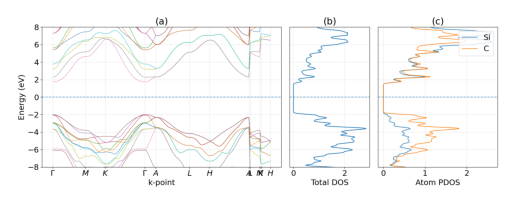

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(plt.imread('slakonet_bands_dos.png'))
plt.axis('off')
plt.show()



In [5]:
!ls /content/Software/slakonet/slakonet/examples

config_example.json
ES-SinglePropertyPrediction-bandgap-dft_3d-test-mae.csv
fig3d_pred_analysis.py
plot_fig2.py
plot_fig3.py
plot_fig3v2.py
plot_fig5.py
POSCAR-AlN-GaN.vasp
POSCAR-JVASP-107.vasp
POSCAR-Si-amor.vasp
POSCAR-SiC-3C-3x3x3N.vasp
POSCAR-SiC-3C-3x3x3.vasp
POSCAR-SiC-3C.vasp
POSCAR-Si-GaAs.vasp
run_inference.py
sk_schematic.png
slakonet_bands_dos.png
timing.png


## Command line prediction example (Nitrogen doped SiC)

In [6]:
!predict_slakonet.py  --file_path /content/Software/slakonet/slakonet/examples/POSCAR-SiC-3C-3x3x3N.vasp

/usr/local/bin/predict_slakonet.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('slakonet==2025.9.1')
Loading cached model from /content/Software/slakonet/slakonet/slakonet_v0/slakonet_v0.pt
✅ Compact model loaded from: /content/Software/slakonet/slakonet/slakonet_v0/slakonet_v0.pt
Time taken: 113.424
/usr/local/lib/python3.12/dist-packages/jarvis/analysis/structure/spacegroup.py:315: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  n = self._dataset["number"]
System is metallic - bands cross Fermi level
fermi energy tensor([[-0.0662]], device='cuda:0', requires_grad=True)
Fermi: -1.801 eV | Gap: 0.000 eV


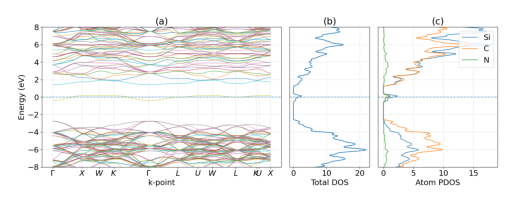

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(plt.imread('slakonet_bands_dos.png'))
plt.axis('off')
plt.show()



## Script example

In [ ]:
%%time
from slakonet.optim import (
    MultiElementSkfParameterOptimizer,
    get_atoms,
    kpts_to_klines,
    default_model,
)
from jarvis.core.kpoints import Kpoints3D as Kpoints

import torch
from slakonet.atoms import Geometry
from slakonet.main import generate_shell_dict_upto_Z65

model = default_model()

Loading cached model from /content/Software/slakonet/slakonet/slakonet_v0/slakonet_v0.pt
✅ Compact model loaded from: /content/Software/slakonet/slakonet/slakonet_v0/slakonet_v0.pt
Time taken: 113.28
CPU times: user 1min 53s, sys: 1.26 s, total: 1min 54s
Wall time: 1min 59s


In [ ]:
%%time

# Get structure (example with JARVIS ID)
atoms, opt_gap, mbj_gap = get_atoms("JVASP-107")
kpoints = Kpoints().kpath(atoms, line_density=20)
klines = kpts_to_klines(kpoints.kpts, default_points=2)
geometry = Geometry.from_ase_atoms([atoms.ase_converter()])
# or provide kpoints as grid
# kpoints = torch.tensor([3,3,3])
shell_dict = generate_shell_dict_upto_Z65()

# Compute electronic properties
with torch.no_grad():
    properties, success = model.compute_multi_element_properties(
        geometry=geometry,
        shell_dict=shell_dict,
        klines=klines,
        #kpoints=kpoints,
        get_fermi=True,
        #device="cuda"
    )

# Access results
print(f"Band gap: {properties['band_gap_eV']:.3f} eV")
print(f"Fermi energy: {properties['fermi_energy_eV']:.3f} eV")

# Plot band structure and DOS
eigenvalues = properties["eigenvalues"]
dos_values = properties['dos_values_tensor']
dos_energies = properties['dos_energy_grid_tensor']

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


100%|██████████| 40.8M/40.8M [00:03<00:00, 12.4MiB/s]


Loading the zipfile...
Loading completed.


/usr/local/lib/python3.12/dist-packages/jarvis/analysis/structure/spacegroup.py:315: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  n = self._dataset["number"]


fermi energy tensor([[-0.0909]], device='cuda:0', requires_grad=True)
Band gap: 3.739 eV
Fermi energy: -2.473 eV
CPU times: user 15.8 s, sys: 1.15 s, total: 16.9 s
Wall time: 20.7 s


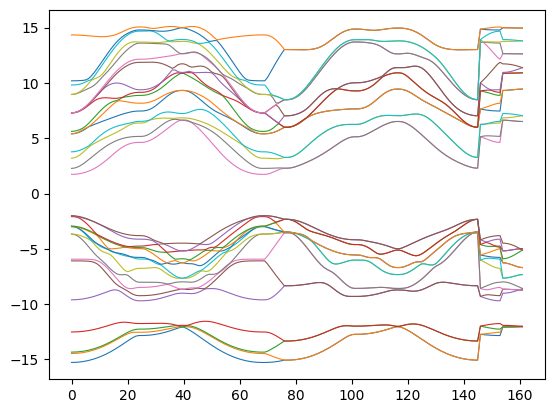

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# From: https://github.com/atomgptlab/slakonet/blob/main/slakonet/predict_slakonet.py
# Bands: energy relative to Fermi
H2E = 27.21138505  # Hartree to eV
fermi_eV = float(properties["fermi_energy_eV"])  # scalar eV
eigenvalues = properties["calc"].eigenvalue * H2E
for i in range(eigenvalues.shape[-1]):
    y = eigenvalues[0, :, i].real.detach().cpu().numpy() - fermi_eV
    plt.plot(y, linewidth=0.8)

## Finetune model on your own dataset

In [ ]:
import os
os.chdir('/content/Software/slakonet')
# Adjust xml_folder_path in your config_example.json
!train_slakonet.py --config_name /content/Software/slakonet/slakonet/examples/config_example.json

/usr/local/bin/train_slakonet.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('slakonet==2025.9.1')
Loading cached model from /content/Software/slakonet/slakonet/slakonet_v0/slakonet_v0.pt
✅ Compact model loaded from: /content/Software/slakonet/slakonet/slakonet_v0/slakonet_v0.pt
Time taken: 116.329
LOADING MULTIPLE VASP DATASETS
Found 2 VASP calculations:
   1. slakonet/tests/vasprun-1002.xml
   2. slakonet/tests/vasprun-107.xml
_load_single_dataset {'index': 0, 'vasprun_path': 'slakonet/tests/vasprun-1002.xml', 'geometry': Geometry(Si2), 'target_energy': 1125.91021985, 'target_bandgap': np.float64(1.2763999999999998), 'target_dos': tensor([0., 0., 0.,  ..., 0., 0., 0.]), 'dos_energies': tensor([-9.2109, -9.1991, -9.1873,  ..., 49.6796, 49.6914, 49.7032]), 'elements': {'Si'}, 'composition': OrderedDict({'Si': 2}), 'metadata': {'natoms': 2, 'formula': 'Si', 'volume': 41.44

In [ ]:
%matplotlib inline
from tqdm import tqdm
import time
from jarvis.core.kpoints import Kpoints3D as Kpoints
from slakonet.atoms import Geometry
from slakonet.optim import get_atoms
import matplotlib.pyplot as plt
from slakonet.optim import (
    MultiElementSkfParameterOptimizer,
    get_atoms,
    kpts_to_klines,
    default_model,
)
from slakonet.main import generate_shell_dict_upto_Z65


model_best = default_model()

atoms, _, _ = get_atoms(jid="JVASP-1002")
shell_dict = generate_shell_dict_upto_Z65()
kpoints = torch.tensor([1, 1, 1])

scells = [1, 2, 3, 4, 5, 6, 7, 8] #, 9, 10]
# scells=[1,2,3,4,5]
times_gpu = []
times_cpu = []
nums = []
for i in scells:
    s = atoms.make_supercell_matrix([i, i, i])
    geometry = Geometry.from_ase_atoms([s.ase_converter()])
    with torch.no_grad():  # No gradients needed for inference
        t1 = time.time()
        properties, success = model_best.compute_multi_element_properties(
            geometry=geometry,
            shell_dict=shell_dict,
            kpoints=kpoints,
            get_energy=True,
            device="cpu",
        )
        en = properties["total_energy"]
        t2 = time.time()
        times_cpu.append(t2 - t1)
        # print(times_cpu[-1])
        nums.append(s.num_atoms)
    with torch.no_grad():  # No gradients needed for inference
        t1 = time.time()
        properties, success = model_best.compute_multi_element_properties(
            geometry=geometry,
            shell_dict=shell_dict,
            kpoints=kpoints,
            get_energy=True,
            device="cuda",
        )
        en = properties["total_energy"]
        t2 = time.time()
        times_gpu.append(t2 - t1)
        # print(times_gpu[-1])

    print("i,num,cpu,gpu", i, s.num_atoms, times_cpu[-1], times_gpu[-1])
print("nums", nums)
print("times_cpu", times_cpu)
print("times_gpu", times_gpu)

Loading cached model from /content/Software/slakonet/slakonet/slakonet_v0/slakonet_v0.pt
✅ Compact model loaded from: /content/Software/slakonet/slakonet/slakonet_v0/slakonet_v0.pt
Time taken: 112.322
Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.
i,num,cpu,gpu 1 2 8.73747730255127 9.469879627227783
i,num,cpu,gpu 2 16 10.042244911193848 9.32802128791809
i,num,cpu,gpu 3 54 9.9648277759552 8.542931318283081
i,num,cpu,gpu 4 128 9.88958191871643 10.633336782455444
i,num,cpu,gpu 5 250 12.710638999938965 11.298696279525757
i,num,cpu,gpu 6 432 24.089404821395874 15.25683307647705


In [ ]:
import torch
import sys
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 22})
# On H200
nums = [2, 16, 54, 128, 250, 432, 686, 1024, 1458, 2000]
times_cpu_h200 = [
    4.981168746948242,
    4.553197622299194,
    4.88469934463501,
    5.553440093994141,
    7.160606145858765,
    13.558997869491577,
    34.77856516838074,
    99.5997314453125,
    255.79310011863708,
    631.9005651473999,
]
times_gpu_h200 = [
    5.525652647018433,
    4.9758460521698,
    4.890452861785889,
    5.127196788787842,
    5.881839990615845,
    7.848914384841919,
    12.485913515090942,
    22.772614002227783,
    41.18002128601074,
    75.67503428459167,
]

# plt.plot(nums, times_cpu)
# plt.plot(nums, times_gpu)
# plt.tight_layout("times.png")
# plt.close()

# sys.exit()